<a href="https://colab.research.google.com/github/edermartelinho/Ciencia_de_Dados_Python/blob/main/Ciencia_de_Dados_An%C3%A1lise_ANOVAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#* Importando as Bibliotecas para as Análises

In [ ]:
!pip install pandas-flavor
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.2 MB/s eta 0:00:00


In [ ]:
import math
import pandas as pd
import pandas_flavor as pf
import numpy as np
from numpy.testing import suppress_warnings
import numpy.linalg
import numpy.linalg._umath_linalg
#import numpy.linalg._umath_linalg._ilp64
import pingouin as pg
import sklearn
import scipy.stats as sct
from scipy.stats import norm
#from numpy.testing import suppr
from scipy import constants
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf

#* Importando o Banco Pelo Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#* Teste Análise de Variância (ANOVA)
Utilizada para comparar a variável de interesse com uma ou mais variáveis categóricas

Pressupostos:
- Variável resposta possui distribuição normal
- Homogeneidade das variâncias (variâncias parecidas)
- Amostras independentes.

In [ ]:
diabeteMellitus=pd.read_csv('/content/drive/MyDrive/Ciencia_Dados_git/ DiabetesMellitus.csv')

In [ ]:
diabeteMellitus['IMC_OMS_CAT'].value_counts()

,count
IMC_OMS_CAT,
Obseso,155
Sobrepeso,31
Peso normal,10


#* Separando os Grupos

In [ ]:
filtro3  = diabeteMellitus['IMC_OMS_CAT'] == 'Obseso'
filtro4  = diabeteMellitus['IMC_OMS_CAT'] == 'Peso normal'
filtro5  = diabeteMellitus['IMC_OMS_CAT'] == 'Sobrepeso'
obeso = diabeteMellitus[filtro3]
normal = diabeteMellitus[filtro4]
sobrepeso = diabeteMellitus[filtro5]

#* Teste de Homocedasticidade

In [ ]:
[[normal['Pressao Diaastolica'].mean(),normal['Pressao Diaastolica'].std()] , [sobrepeso['Pressao Diaastolica'].mean(), sobrepeso['Pressao Diaastolica'].std()], [obeso['Pressao Diaastolica'].mean(),obeso['Pressao Diaastolica'].std()]]

[[65.4, 12.112436217008991],
 [65.29032258064517, 8.726181098231905],
 [74.26451612903226, 12.37145720996984]]

#* Teste Homogeneidade das Variâncias*
##HO: A variação da pressão diastólica das mulheres com diabete melittus é parecida para qualquer tipo de classificação do IMC (Normal, sobrepeso, obeso)

H1: Pelo menos uma comparação difere

In [ ]:
stats.bartlett(obeso['Pressao Diaastolica'], normal['Pressao Diaastolica'], sobrepeso['Pressao Diaastolica'])

BartlettResult(statistic=5.1000709595925855, pvalue=0.07807889572869388)

#* Interpretação:
##A variância da pressão diastólica das mulheres com diabette melittus é parecida para a classificação do IMC pelo OMS (p-valor=0,08 > 0,05). É possível também observar através do Boxplot abaixo, que a variabilidade entre os grupos de IMC é parecida apesar de que a variabilidade das mulherss com peso normal ser menor porém não diferente estatisticamente das demais.

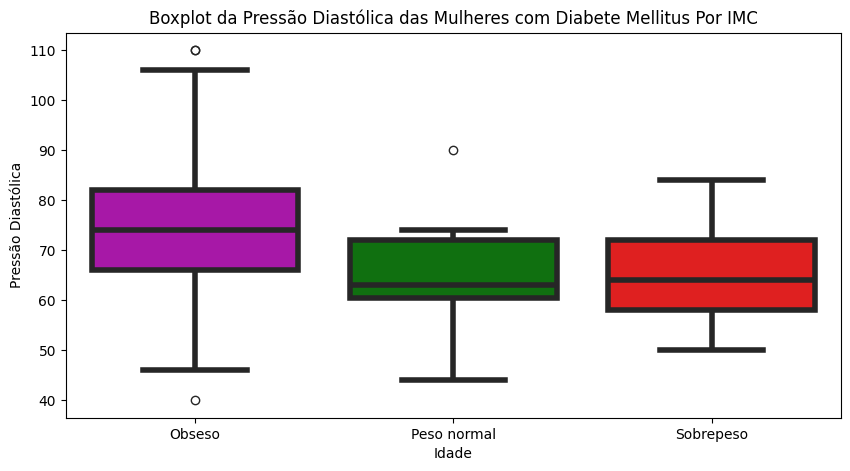

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot(x= 'IMC_OMS_CAT', y = 'Pressao Diaastolica', data = diabeteMellitus, hue='IMC_OMS_CAT', linewidth=4, palette=["m", "g", "r"])
plt.xlabel('Idade')
plt.ylabel('Pressão Diastólica')
plt.title('Boxplot da Pressão Diastólica das Mulheres com Diabete Mellitus Por IMC')

plt.show()

In [ ]:
data=[list(obeso['Pressao Diaastolica']), list(normal['Pressao Diaastolica']), list(sobrepeso['Pressao Diaastolica'])]
pg.homoscedasticity(data,method="bartlett")

,T,pval,equal_var
bartlett,5.100071,0.078079,True


In [ ]:
pg.homoscedasticity(data,method="levene")

,W,pval,equal_var
levene,1.426709,0.242618,True


#* Teste ANOVA*
HO: A pressão diastólica média das mulheres com diabete Mellitus não difere pela Classificação do IMC.

H1: Pelo menos uma média difere.

In [ ]:
ANOVA = diabeteMellitus.anova(dv='Pressao Diaastolica', between=['IMC_OMS_CAT'])
ANOVA

,Source,ddof1,ddof2,F,p-unc,np2
0,IMC_OMS_CAT,2,193,9.217885,0.00015,0.087193


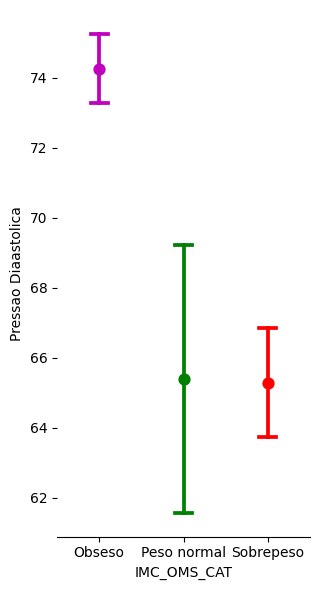

In [ ]:
g = sns.catplot(data=diabeteMellitus, x="IMC_OMS_CAT", y="Pressao Diaastolica", hue="IMC_OMS_CAT",
    capsize=.2, errorbar="se", palette=["m", "g", "r"], kind="point", height=6, aspect=.55,)
g.despine(left=True)#

#*Interpretação: *
##Através do teste ANOVA é possível verificar que a pressão média da presão diastólica das mulheres com diabete Mellitus difere por clasificação do IMC (p-valor=0,00015). É possível observar está diferença no gráfico de médias.

#* Teste de Comparação Múltipla de Tukey
H0: A pressão Diastólica das Mulheres com Diabette Mellitus difere entre mulheres com peso normal e sobrepeso; ou peso normal e obeso; obeso e sobrepeso.

H1: As médias diferem (duas a duas)

In [ ]:
diabeteMellitus.pairwise_tests(dv='Pressao Diaastolica', between=['IMC_OMS_CAT'], effsize='none')


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,none
0,IMC_OMS_CAT,Obseso,Peso normal,False,True,2.240161,10.249545,two-sided,0.048372,2.296,0.717351
1,IMC_OMS_CAT,Obseso,Sobrepeso,False,True,4.835913,57.168197,two-sided,0.000010,5278.482,0.757070
2,IMC_OMS_CAT,Peso normal,Sobrepeso,False,True,0.026502,12.163668,two-sided,0.979287,0.343,0.011408


#* Interpretando
##Realizando o teste de comparação múltipla de Tukey, foi verificado que as mulheres com diabete Mellitus classificadas como obesas possuem a pressão diastólica maior que as mulheres com peso normal (p-valor=0,048) e também com as que possuem sobrepeso (p-valor=0.000010), ao nível de 5% de significância. Porém não houve diferença estatísticamente significante da pressão diastólica entre as mulheres com peso normal e sobrepeso. Esses resultados é possível ser observado no Gráfico de Média.



#* Teste Anova Comparando Mais de Uma variável Independente

In [ ]:
ANOVA = diabeteMellitus.anova(dv='Pressao Diaastolica', between=['IMC_OMS_CAT','CatIdade'])
ANOVA

,Source,SS,DF,MS,F,p-unc,np2
0,IMC_OMS_CAT,2581.318894,2.0,1290.659447,9.836811,0.000086,0.093830
1,CatIdade,1800.885958,1.0,1800.885958,13.725522,0.000277,0.067373
2,IMC_OMS_CAT * CatIdade,444.706382,2.0,222.353191,1.694673,0.186423,0.017526
3,Residual,24929.349596,190.0,131.207103,NaN,NaN,NaN


#Perguntas para ser respondida pelo teste:

1) A média da pressão diastólica das mulheres com diabete Mellitus difere pela classificação do IMC?

2) A média da pressão diastólica das mulheres com diabete Mellitus difere pela idade no periodo reprodutivo?

3) A média da pressão diastólica das mulheres com diabete Mellitus difere entre a classificação do IMC juntamente com a idade no período reprodutivo? Ou seja, por exemplo: a pressão diastólica das mulheres obesas difere do período reprodutivo que ela está?



#* Interpretação:
Foi realizado o teste ANOVA para verificar se existia diferença da pressão diastólica entre o IMC e a idade de mulheres. Foi verificado que, existe diferença estatística entre o IMC e a IDADE, poŕem não existe interação entre as variáveis, ao nível de 5% de significância.



#* Teste de Tukey para verificar a diferença entre a média da pressão diastólica das mulheres com idade menor ou igual à 35 anos e mulheres com idade superior à 35 anos.

In [ ]:
diabeteMellitus.pairwise_tests(dv='Pressao Diaastolica', between=('CatIdade'),effsize='none').round(5)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,none
0,CatIdade,Não-Reprodutiva,Reprodutiva,False,True,3.64335,150.5581,two-sided,0.00037,67.88,0.53083


#*Gráficos da Pressão Diastólica Por Idade

<ipython-input-18-7f535be7d6a9>:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x= 'IMC_OMS_CAT', y = 'Pressao Diaastolica', data = diabeteMellitus, hue='CatIdade', linewidth=4, palette=["m", "g", "r"])


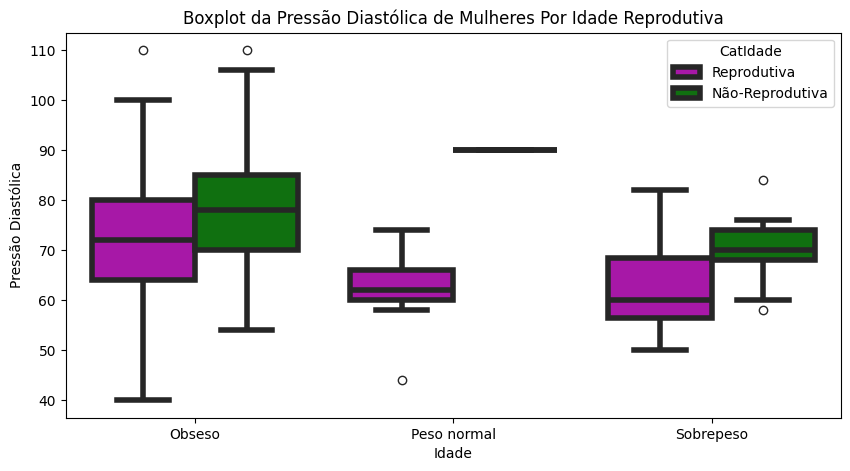

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot(x= 'IMC_OMS_CAT', y = 'Pressao Diaastolica', data = diabeteMellitus, hue='CatIdade', linewidth=4, palette=["m", "g", "r"])
plt.xlabel('Idade')
plt.ylabel('Pressão Diastólica')
plt.title('Boxplot da Pressão Diastólica de Mulheres Por Idade Reprodutiva')

plt.show()

<Figure size 1000x500 with 0 Axes>

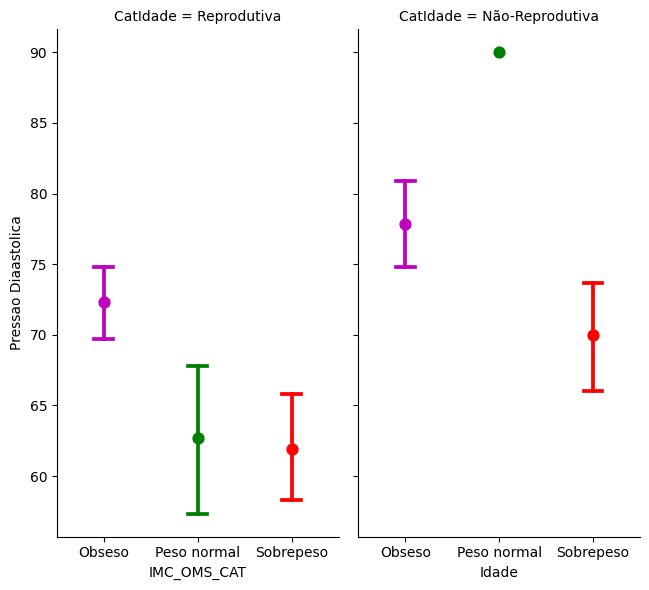

In [ ]:
plt.figure(figsize = (10,5))

sns.catplot(data=diabeteMellitus, x="IMC_OMS_CAT", y="Pressao Diaastolica", hue="IMC_OMS_CAT",col="CatIdade",
    capsize=.2, palette=["m", "g", "r"], errorbar="ci", kind="point", height=6, aspect=.55)
#g.despine(left=True)

plt.xlabel('Idade')
plt.ylabel('Pressão Diastólica')
#plt.title('Boxplot da Pressão Diastólica de Mulheres Por Idade Reprodutiva')

plt.show()

#* Teste Qui-Quadrado de Independência
Utilizado para testar se duas variáveis representadas em uma tabela de contigência são independentes entre si. Ou seja, verificar se as proporções das diversas categorias de uma variável difere nas categorias da outra variável.

Ex.: Verificar se a proporção de mulheres com diabete mellitus diferencia entre mulheres com idade reprodutiva ou não reprodutiva.

#* Construindo as Tabelas que Serão Testadas

In [ ]:
CroosIdadeAbsoluta=pd.crosstab(diabeteMellitus.CatIdade, diabeteMellitus.GlicoseCat, margins=True,normalize="index").mul(100).round(1)
CroosIdadeAbsoluta

GlicoseCat,Pre-diabetico,Saudavel
CatIdade,,
Não-Reprodutiva,65.2,34.8
Reprodutiva,36.2,63.8
All,46.4,53.6


#*Teste Qui-Quadrado Utilizando o Scipy

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
expected, observed, stats = pg.chi2_independence(diabeteMellitus, x='CatIdade', y='Diabetes')

In [ ]:
stats.round(15)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,19.198297,1.0,0.000012,0.312970,0.992274
1,cressie-read,0.666667,19.308242,1.0,0.000011,0.313865,0.992537
2,log-likelihood,0.000000,19.692902,1.0,0.000009,0.316976,0.993388
3,freeman-tukey,-0.500000,20.137677,1.0,0.000007,0.320536,0.994257
4,mod-log-likelihood,-1.000000,20.731466,1.0,0.000005,0.325227,0.995246
5,neyman,-2.000000,22.440967,1.0,0.000002,0.338371,0.997259


In [ ]:
Esperado=expected.round(0)
Esperado

Diabetes,Diabética,Não-Diabética
CatIdade,,
Não-Reprodutiva,35.0,34.0
Reprodutiva,64.0,63.0


H0: Proporções Parecidas

H1: Pelo Menos 1 Difere

In [ ]:
testequiquadrado= stats
testequiquadrado

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,19.198297,1.0,0.000012,0.312970,0.992274
1,cressie-read,0.666667,19.308242,1.0,0.000011,0.313865,0.992537
2,log-likelihood,0.000000,19.692902,1.0,0.000009,0.316976,0.993388
3,freeman-tukey,-0.500000,20.137677,1.0,0.000007,0.320536,0.994257
4,mod-log-likelihood,-1.000000,20.731466,1.0,0.000005,0.325227,0.995246
5,neyman,-2.000000,22.440967,1.0,0.000002,0.338371,0.997259


#* Interpretação:
Através do teste-quiquadrado de Pearson, foi observado que existe diferença entre as proporções de mulheres entre diabete e idade no período reprodutivo (P-Valor=2.026469e-11). Ou seja, as mulheres com 35 anos ou mais, possuem um porcentagem maior de açucar no sangue (51%) do que as que possuem menos de 35 anos (49%). Já nas mulheres não diabéticas, estas proporções são de 27% e 73%.negrito

#* Análise Gráfica da Correlação

##* Teste de Correlação

#Pressupostos:

Se o teste for o de Pearson, pelo menos uma da variável tem que ter distribuição normal. Já o de spearman, não precisa ter distribuição normal.

HO:  ρ=0,  ou seja, não existe uma correlação importante

H1:  ρ≠0,  a correlação é importante



#* Testando a correlação da Espessura da Dobra Cutânea do Triceps com a pressão diastólica

In [ ]:
diabeteMellitus

,Unnamed: 0.1,Unnamed: 0,Id Pacientes,N_gravidez,concentracao de glicose após duas horas,Pressao Diaastolica,Espessura da dobra cutânea (mm),Insulina 2 hrs ((mm U/ml),IMC,DiabetesPedigreeFunction,Age,Saudavel,Diabetes,CatIdade,GlicoseCat,InsulinaCat,IMC_OMS_CAT
0,7,7,21,3,126,88,41,235,39.3,704.00,27,0,Não-Diabética,Reprodutiva,Saudavel,Diabetes Mellitus,Obseso
1,9,9,28,1,97,66,15,140,23.2,487.00,22,0,Não-Diabética,Reprodutiva,Saudavel,Diabetes Mellitus,Peso normal
2,16,16,36,4,103,60,33,192,24.0,966.00,33,0,Não-Diabética,Reprodutiva,Saudavel,Diabetes Mellitus,Peso normal
3,28,28,55,7,150,66,42,342,34.7,718.00,42,0,Não-Diabética,Não-Reprodutiva,Pre-diabetico,Diabetes Mellitus,Obseso
4,32,32,60,0,105,64,41,142,41.5,173.00,22,0,Não-Diabética,Reprodutiva,Saudavel,Diabetes Mellitus,Obseso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,748,748,717,3,173,78,39,185,33.8,0.97,31,1,Diabética,Reprodutiva,Pre-diabetico,Diabetes Mellitus,Obseso
192,750,750,723,1,149,68,29,127,29.3,349.00,42,1,Diabética,Não-Reprodutiva,Pre-diabetico,Diabetes Mellitus,Sobrepeso
193,755,755,741,11,120,80,37,150,42.3,785.00,48,1,Diabética,Não-Reprodutiva,Saudavel,Diabetes Mellitus,Obseso
194,758,758,749,3,187,70,22,200,36.4,408.00,36,1,Diabética,Não-Reprodutiva,Pre-diabetico,Diabetes Mellitus,Obseso


In [33]:
diabeteMellitus['IMC'].corr(diabeteMellitus['Pressao Diaastolica'], method='pearson')

0.40802692758832637

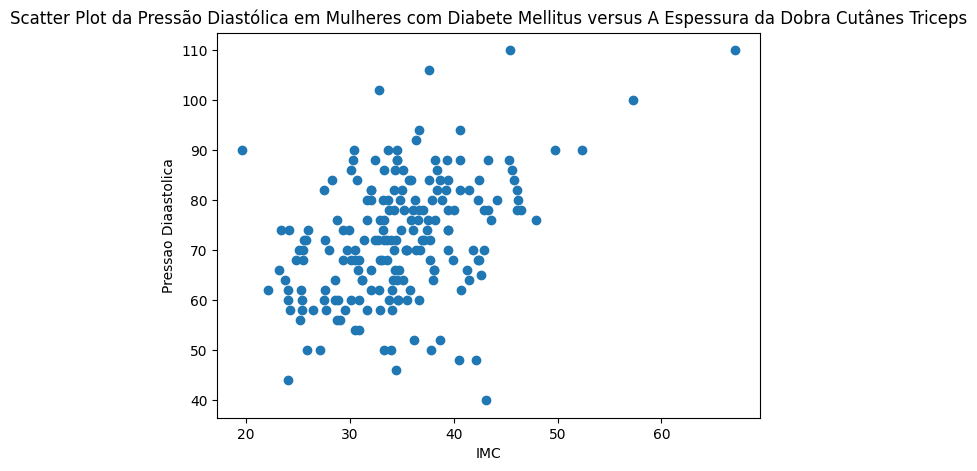

In [35]:
plt.figure(figsize = [7,5])
plt.scatter( 'IMC', 'Pressao Diaastolica', data=diabeteMellitus)
plt.title('Scatter Plot da Pressão Diastólica em Mulheres com Diabete Mellitus versus A Espessura da Dobra Cutânes Triceps')
plt.ylabel('Pressao Diaastolica')
plt.xlabel('IMC')
plt.show()

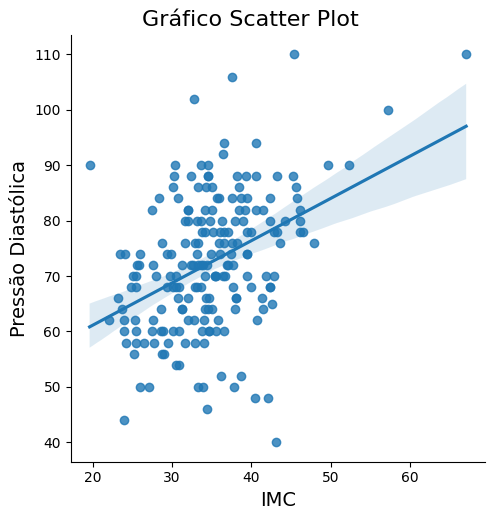

In [37]:
ax = sns.lmplot(x="IMC", y="Pressao Diaastolica", data=diabeteMellitus)
ax.fig.set_size_inches(5, 5)
ax.fig.suptitle('Gráfico Scatter Plot', fontsize=16, y=1.02)
ax.set_xlabels("IMC", fontsize=14)
ax.set_ylabels("Pressão Diastólica", fontsize=14)
ax

In [38]:
pg.corr(diabeteMellitus['Pressao Diaastolica'], diabeteMellitus['IMC'], method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,196,0.408027,"[0.28, 0.52]",2.916594e-09,3.511e+06,0.999977


#* Interpretação:
##Através do scatter plot é possível observar que a medida que a espessura da dobra do triceps aumenta, ocorre um leve aumento na pressão diastólica (r=0.25).Através do teste de correlação de Pearson é observado que esta relação é significante ao nível de 5% de significância. Ou seja, a relação existente é significativa e pode ser realizada a regressão linear para criar uma função que descreva essa relação.



#Regressão Linear Simples
A equação da regressão linear simples estimada é dada por:

ŷ=βx+ϵ,

em que: ŷ é o valor da variável resposta ou característica principal;  β  é o quanto y é influenciaado por cada unidade de x;

ϵ  é a influência de outras variáveis que não estão no modelo.

Regressão Linear Múltipla
ŷ=β1x1+β2x2+β3x3+ϵ,

In [39]:
lmCDiastolica = pg.linear_regression(diabeteMellitus['IMC'],diabeteMellitus['Pressao Diaastolica'])
lmCDiastolica

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,45.894600,4.332783,10.592406,5.573530e-21,0.166486,0.16219,37.349192,54.440008
1,IMC,0.762193,0.122442,6.224912,2.916594e-09,0.166486,0.16219,0.520704,1.003682


In [40]:
#Para um IMC de 30, qual seria o valor da pressão diastólica?
#y=0.76*x+45.89
y=0.76*23+45.89
y

63.370000000000005

In [41]:
lmCDiastolica = pg.linear_regression(diabeteMellitus[['IMC','Age', 'concentracao de glicose após duas horas', 'N_gravidez']],diabeteMellitus['Pressao Diaastolica'])
lmCDiastolica

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,33.944234,5.856637,5.795857,2.766937e-08,0.247502,0.231742,22.392240,45.496228
1,IMC,0.794415,0.118044,6.729852,1.927730e-10,0.247502,0.231742,0.561579,1.027252
2,Age,0.211957,0.093260,2.272746,2.415503e-02,0.247502,0.231742,0.028005,0.395909
3,concentracao de glicose após duas horas,0.015813,0.029202,0.541517,5.887824e-01,0.247502,0.231742,-0.041787,0.073414
4,N_gravidez,0.408996,0.308040,1.327736,1.858499e-01,0.247502,0.231742,-0.198601,1.016593


In [42]:
# Se uma mulher possui 60 anos e um IMC de 32, qual será a pressão diastólica dela?
#y=0.79*x1+0.21*x2+0.02*x3+0.41*x4+33.94
y=0.79*40+0.21*60+0.02*150-0.41*5+33.94
round(y,2)

79.09

#* Interpretação:
A relação existente entre a pressão diatólica das mulheres com diabete Mellitus e as variáveis idade, IMC, nº de gravidez e concentração de glicose no sangue após duas horas pode ser descrita pela equação:

y=0.79x1+0.21∗x2+0.41∗x3+0.02∗x4+33.94

Observa-se através da regressão linear múltipla que todos os coeficientes foram signinifantes ao nível de 5% de significância. A cada aumento aumento de uma unidade do IMC, a pressão aumenta 0.79. A cada filho gerado a pressão aumenta 0.41. O intercepto de 33.94, mostra que mais variáveis podem ser acrescentadas no modelo para explicar a pressão diastólica. A variabilidade da pressão diastólica é explicada em  r2=26%,  com outras variáveis no modelo esta variabilidade pode ser mais explciada.



#* Concentração de Glicose no Sangue

In [43]:
diabeteMellitus['Pressao Diaastolica'].corr(diabeteMellitus['concentracao de glicose após duas horas'],method='spearman')

0.13225694095646348

In [44]:
pg.corr(diabeteMellitus['Pressao Diaastolica'], diabeteMellitus['concentracao de glicose após duas horas'],method='spearman').round(5)

,n,r,CI95%,p-val,power
spearman,196,0.13226,"[-0.01, 0.27]",0.06462,0.45716


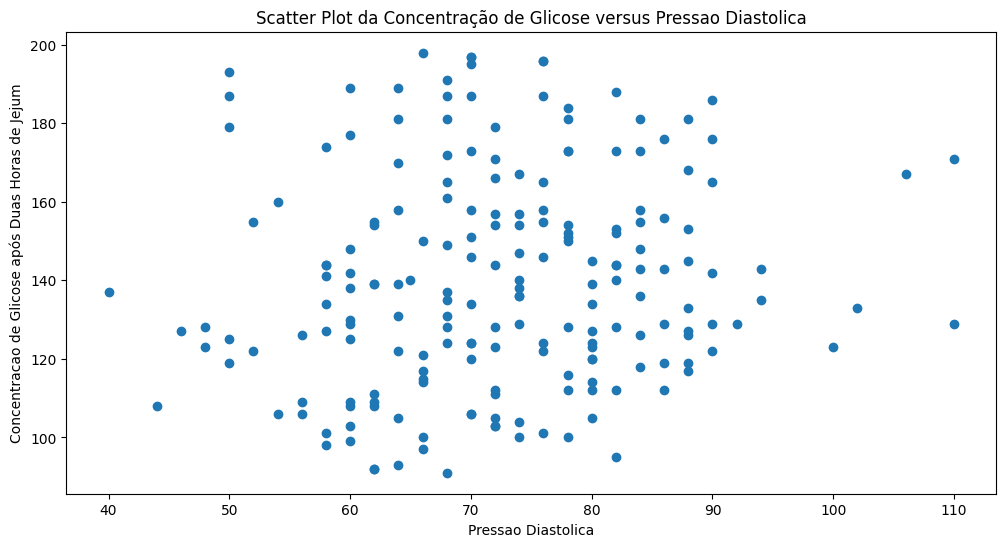

In [45]:
plt.figure(figsize = [12,6])
plt.scatter( 'Pressao Diaastolica', 'concentracao de glicose após duas horas', data=diabeteMellitus)
plt.title('Scatter Plot da Concentração de Glicose versus Pressao Diastolica')
plt.ylabel('Concentracao de Glicose após Duas Horas de Jejum')
plt.xlabel('Pressao Diastolica')
plt.show()

#* Insulina no Sangue Após duas Horas de Jejum

In [46]:
diabeteMellitus['Pressao Diaastolica'].corr(diabeteMellitus['Insulina 2 hrs ((mm U/ml)'],method='spearman')

0.06829187696308149

In [47]:
TesteCorrelacao=pg.corr(diabeteMellitus['Pressao Diaastolica'], diabeteMellitus['Insulina 2 hrs ((mm U/ml)'],method='spearman').round(5)
TesteCorrelacao

,n,r,CI95%,p-val,power
spearman,196,0.06829,"[-0.07, 0.21]",0.34156,0.15851


In [48]:
lmInsulina = pg.linear_regression( diabeteMellitus['Insulina 2 hrs ((mm U/ml)'],diabeteMellitus['Pressao Diaastolica'])
lmInsulina

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,72.172951,1.909688,37.793051,2.082076e-91,0.000087,-0.005067,68.406535,75.939368
1,Insulina 2 hrs ((mm U/ml),0.000937,0.007212,0.129942,8.967473e-01,0.000087,-0.005067,-0.013288,0.015162


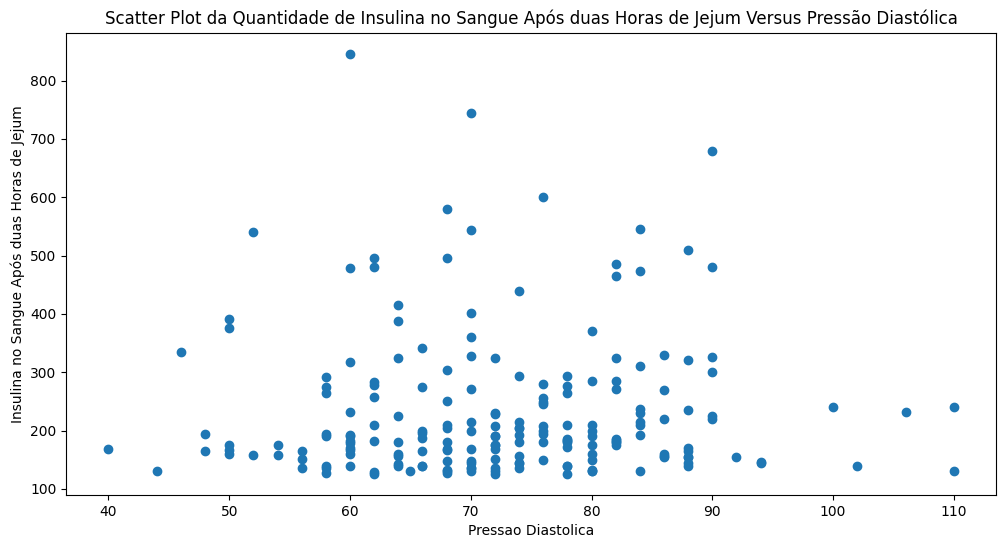

In [49]:
plt.figure(figsize = [12,6])
plt.scatter( 'Pressao Diaastolica', 'Insulina 2 hrs ((mm U/ml)', data=diabeteMellitus)
plt.title('Scatter Plot da Quantidade de Insulina no Sangue Após duas Horas de Jejum Versus Pressão Diastólica')
plt.ylabel('Insulina no Sangue Após duas Horas de Jejum')
plt.xlabel('Pressao Diastolica')
plt.show()

#* Número de Gravidez

In [50]:
diabeteMellitus['Pressao Diaastolica'].corr(diabeteMellitus['N_gravidez'],method='spearman')

0.16894736884031475

In [51]:
pg.corr(diabeteMellitus['Pressao Diaastolica'], diabeteMellitus['N_gravidez'],method='spearman').round(5)

,n,r,CI95%,p-val,power
spearman,196,0.16895,"[0.03, 0.3]",0.01792,0.661


#* IMC

In [52]:
diabeteMellitus['Pressao Diaastolica'].corr(diabeteMellitus['IMC'],method='spearman')

0.3748133207332354

In [53]:
pg.corr(diabeteMellitus['Pressao Diaastolica'], diabeteMellitus['IMC'],method='spearman').round(8)

,n,r,CI95%,p-val,power
spearman,196,0.374813,"[0.25, 0.49]",6.000000e-08,0.999789


In [54]:
lmGravidez = pg.linear_regression(diabeteMellitus['N_gravidez'],diabeteMellitus['Pressao Diaastolica'])
lmGravidez

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,69.644080,1.300801,53.539360,3.689473e-118,0.039774,0.034824,67.078551,72.209608
1,N_gravidez,0.740056,0.261068,2.834727,5.072200e-03,0.039774,0.034824,0.225160,1.254951
